<a href="https://colab.research.google.com/github/dishydon/Yoga-Asana-Recommendation-Model/blob/main/Siddharth_NLP_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
!pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 398 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=a29910a80c587b060189ab565aa8069976bb91b8e391f1a24a59b031d82fd9bc
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [5]:
import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [6]:
df = pd.read_csv("/content/drive/MyDrive/final_data2.csv")
# df.fillna("",inplace=True)

In [7]:
df.columns


Index(['Benefits', 'Contraindication', 'Yoga Asan'], dtype='object')

In [8]:
df=df.dropna()

In [9]:
df.reset_index()

,index,Benefits,Contraindication,Yoga Asan
0,0,Corrects bad posture by straightening the spin...,If you have Parkinson’s disease or a spinal di...,TADASANA or MOUNTAIN POSTURE
1,1,Relieves gastritis indigestion acidity and fla...,If you are prone to dizzy spells vertigo or hi...,UTTHITA TRIKONASANA or EXTENDED TRIANGLE POSE
2,2,Improves breathing capacity by expanding the c...,Do not practise if you have a cardiac conditio...,VIRABHADRASANA 2 or WARRIOR POSE 2
3,3,"Enhances lung capacity , Tones the muscles of ...",If you have high blood pressure avoid this asa...,UTTHITA PARSVAKONASANA or EXTENDED SIDE STRETCH
4,4,"Cools the brain and soothes the nerves, Reliev...",If you have high blood pressure or a cardiac c...,PARSVOTTANASANA or INTENSE TORSO STRETCH
...,...,...,...,...
507,583,"Strengthens core, arms, shoulders, elbows and ...","Hips,Knees,Shoulders,Back or Wrists Injury",Kukkutasana(Rooster)
508,584,"Strengthens core, arms, and shoulders. Improve...","Hips,Knees,Shoulders,Back Injury",Karandavasana(Himalayan Duck)
509,585,Strengthens the core and arms.,"Shoulders,Hips,Wrists or Pelvic Muscle injury",Lolasana(Pendant)
510,586,Stretches the entire front body and opens the ...,"Arms,Hips,Knees Injury",Dvi Pada Viparita Dandasana(Inverted Staff)


In [10]:
x1='Benefits'
x2='Yoga Asan'

In [11]:
data = df[[x1,x2]]
data = data.dropna()
data=data.reset_index()
# df.fillna("",inplace=True)
data

,index,Benefits,Yoga Asan
0,0,Corrects bad posture by straightening the spin...,TADASANA or MOUNTAIN POSTURE
1,1,Relieves gastritis indigestion acidity and fla...,UTTHITA TRIKONASANA or EXTENDED TRIANGLE POSE
2,2,Improves breathing capacity by expanding the c...,VIRABHADRASANA 2 or WARRIOR POSE 2
3,3,"Enhances lung capacity , Tones the muscles of ...",UTTHITA PARSVAKONASANA or EXTENDED SIDE STRETCH
4,4,"Cools the brain and soothes the nerves, Reliev...",PARSVOTTANASANA or INTENSE TORSO STRETCH
...,...,...,...
507,583,"Strengthens core, arms, shoulders, elbows and ...",Kukkutasana(Rooster)
508,584,"Strengthens core, arms, and shoulders. Improve...",Karandavasana(Himalayan Duck)
509,585,Strengthens the core and arms.,Lolasana(Pendant)
510,586,Stretches the entire front body and opens the ...,Dvi Pada Viparita Dandasana(Inverted Staff)


In [12]:
data.shape    

(512, 3)

In [13]:
data.dtypes

index         int64
Benefits     object
Yoga Asan    object
dtype: object

In [14]:
  data[x2].value_counts()

Bharadvajasana                    3
BHARADVAJASANA                    3
Karnapidasana                     3
Marichyasana                      3
Padmasana                         3
                                 ..
Skandasana                        1
Sahaja Navasana                   1
Utkata Konasana                   1
Supta Padangusthasana A Straps    1
Supta Konasana(Supine Angle)      1
Name: Yoga Asan, Length: 461, dtype: int64

In [15]:
data.head()

,index,Benefits,Yoga Asan
0,0,Corrects bad posture by straightening the spin...,TADASANA or MOUNTAIN POSTURE
1,1,Relieves gastritis indigestion acidity and fla...,UTTHITA TRIKONASANA or EXTENDED TRIANGLE POSE
2,2,Improves breathing capacity by expanding the c...,VIRABHADRASANA 2 or WARRIOR POSE 2
3,3,"Enhances lung capacity , Tones the muscles of ...",UTTHITA PARSVAKONASANA or EXTENDED SIDE STRETCH
4,4,"Cools the brain and soothes the nerves, Reliev...",PARSVOTTANASANA or INTENSE TORSO STRETCH


In [16]:
def example_complain(index):
    example = data[data.index == index][[x1,x2]].values[0]
    if len(example) > 0:
        print(example[0])
        print()
        print('Category:', example[1])

In [17]:
example_complain(0)

Corrects bad posture by straightening the spine, Improves the alignment of your body, Counters the degenerative effects of ageing 
on the spine legs and feet, Tones the buttock muscles

Category: TADASANA or MOUNTAIN POSTURE


In [18]:
data = data.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z ]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data[x1] = data[x1].apply(clean_text)

In [19]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z ]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
data[x2] = data[x2].apply(clean_text)


In [20]:
for i in range(len(data[x2])):
  if data[x2][i]==None:
    continue
  for j in range(len(data[x2])):
    if i!=j and data[x2][j]!=None:
      if data[x2][i]==data[x2][j]:
        data[x1][i]=data[x1][i]+' '+data[x1][j]
        data[x1][j]=None;
        data[x2][j]=None;
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
data=data.dropna()
data = data.reset_index(drop=True)

In [22]:
data

,index,Benefits,Yoga Asan
0,0,corrects bad posture straightening spine impro...,tadasana mountain posture
1,1,relieves gastritis indigestion acidity flatule...,utthita trikonasana etended triangle pose
2,2,improves breathing capacity epanding chest hel...,virabhadrasana warrior pose
3,3,enhances lung capacity tones muscles heart rel...,utthita parsvakonasana etended side stretch
4,4,cools brain soothes nerves relieves arthritis ...,parsvottanasana intense torso stretch
...,...,...,...
430,583,strengthens core arms shoulders elbows wrists ...,kukkutasana rooster
431,584,strengthens core arms shoulders improves fleib...,karandavasana himalayan duck
432,585,strengthens core arms,lolasana pendant
433,586,stretches entire front body opens chest tones ...,dvi pada viparita dandasana inverted staff


In [23]:
example_complain(1)

relieves gastritis indigestion acidity flatulence improves fleibility spine alleviates backache corrects alignment shoulders helps treat neck sprains massages tones pelvic area strengthens ankles reduces discomfort menstruation etended triangle good lengthening spine strengthening thighs torso pose also stretches hips groin hamstrings calves shoulders chest spine

Category: utthita trikonasana etended triangle pose


In [24]:
data

,index,Benefits,Yoga Asan
0,0,corrects bad posture straightening spine impro...,tadasana mountain posture
1,1,relieves gastritis indigestion acidity flatule...,utthita trikonasana etended triangle pose
2,2,improves breathing capacity epanding chest hel...,virabhadrasana warrior pose
3,3,enhances lung capacity tones muscles heart rel...,utthita parsvakonasana etended side stretch
4,4,cools brain soothes nerves relieves arthritis ...,parsvottanasana intense torso stretch
...,...,...,...
430,583,strengthens core arms shoulders elbows wrists ...,kukkutasana rooster
431,584,strengthens core arms shoulders improves fleib...,karandavasana himalayan duck
432,585,strengthens core arms,lolasana pendant
433,586,stretches entire front body opens chest tones ...,dvi pada viparita dandasana inverted staff


In [25]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~', lower=True)
tokenizer.fit_on_texts(data[x1].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 2811 unique tokens.


In [26]:
X = tokenizer.texts_to_sequences(data[x1].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (435, 500)


In [27]:
Y = pd.get_dummies(data[x2]).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (435, 435)


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(391, 500) (391, 435)
(44, 500) (44, 435)


In [31]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
# model.add(Dense(337, activation='relu'))

model.add(LSTM(100))
model.add(Dense(435, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 100)          2000000   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 500, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 435)               43935     
                                                                 
Total params: 2,124,335
Trainable params: 2,124,335
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
epochs = 100
batch_size = 16

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=100)])

Epoch 1/100
22/22 [==============================] - 8s 386ms/step - loss: 4.1018 - accuracy: 0.1681 - val_loss: 10.2767 - val_accuracy: 0.0000e+00
Epoch 2/100
22/22 [==============================] - 8s 384ms/step - loss: 3.9607 - accuracy: 0.2051 - val_loss: 10.2951 - val_accuracy: 0.0000e+00
Epoch 3/100
22/22 [==============================] - 8s 384ms/step - loss: 3.7977 - accuracy: 0.3333 - val_loss: 10.3184 - val_accuracy: 0.0000e+00
Epoch 4/100
22/22 [==============================] - 8s 375ms/step - loss: 3.6451 - accuracy: 0.4103 - val_loss: 10.7960 - val_accuracy: 0.0000e+00
Epoch 5/100
22/22 [==============================] - 9s 397ms/step - loss: 3.4932 - accuracy: 0.4672 - val_loss: 10.8324 - val_accuracy: 0.0000e+00
Epoch 6/100
22/22 [==============================] - 9s 390ms/step - loss: 3.3217 - accuracy: 0.5926 - val_loss: 10.7130 - val_accuracy: 0.0000e+00
Epoch 7/100
22/22 [==============================] - 8s 375ms/step - loss: 3.1820 - accuracy: 0.6239 - val_loss:

In [36]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2/2 [==============================] - 0s 64ms/step - loss: 13.8561 - accuracy: 0.0000e+00
Test set
  Loss: 13.856
  Accuracy: 0.000


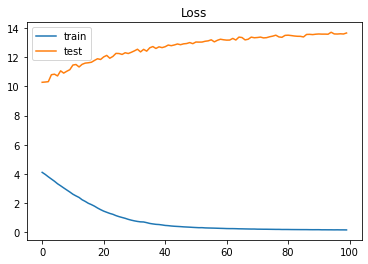

In [37]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [38]:
labels1=list(data[x2])
labels2=list(data[x1])
#labels1

In [39]:
new_complaint = ['blood circulation']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels =labels1
labels3=labels2
for i in range(5):
  print(labels[np.argsort(np.max(pred, axis=0))[-(i+1)]])
  # print(labels3[np.argsort(np.max(pred, axis=0))[-(i+1)]])
# pred

vasisthasana
navasana
halasana plough pose
paschimottanasana back stretching pose
rajakapotasana
